In [1]:
%pylab inline
import numpy as np
import pylab

Populating the interactive namespace from numpy and matplotlib


$1.$ Implement in python the ridge regression with gradient descent. We will call this algorithm regression_gradient. Note that we now have parameters w and b we want to learn on the training set, as well an hyper-parameter to control the capacity of our model: $\lambda$. There are also hyper-parameters for the optimization: the step-size $\eta$, and potentially the number of steps.

In [2]:
class RidgeRegression:
    def __init__(self):
        self.data = []

    def regression_gradient(self, train_data, lam, eta, max_iter):
    
        iteration = 0
        n = train_data.shape[0]
        d = train_data.shape[1]
        t = train_data[:, -1]
    
        self.theta = np.ones(d)
    
        # Add a column of ones to the inputs.
        # The column will be multiplied by the bias
        x0 = np.ones(n)
        X0 = np.reshape(x0, (n, 1))
        X1 = train_data[:,:-1]
        X = np.c_[X0, X1]

        for i in range(max_iter):
            regularization = 2 * lam * self.theta
            f_of_x = np.dot(X, self.theta)
            gradient = 2 * np.dot((f_of_x - t),X)
            self.theta = self.theta - eta*(regularization + gradient)

        self.bias = self.theta[0]
        self.weight = self.theta[1:]
        return self.weight, self.bias

$2.$ Consider the function h(x) = sin(x) + 0.3x − 1. Draw a dataset $D_n$ of pairs (x, h(x)) with n = 15 points where x is drawn uniformly at random in the interval [−5, 5]. Make sure to use the same set $D_n$ for all the plots below.

In [3]:
def fsin(v1):
    return np.sin(v1)+0.3*(v1)-1

def fpre(v2, w, b):
    return w*v2+b

In [4]:
X_train = np.random.uniform(-5,5,15)
Y_train = fsin(X_train)

XX = np.linspace(-10, 10, 50)
YY = fsin(XX)

data = np.vstack((X_train, Y_train))
data_set = np.transpose(data)

$3.$ With $\lambda$ = 0, train your model on $D_n$ with the algorithm regression_gradient(). Then plot on the interval [−10, 10]: the points from the training set $D_n$, the curve h(x), and the curve of the function learned by your model using gradient descent. Make a clean legend. 
Remark: The solution you found with gradient descent should converge to the straight line that is closer from the n points (and also to the analytical solution). Be ready to adjust your step-size (small enough) and number of iterations (large enough) to reach this result.

$4.$ on the same graph, add the predictions you get for intermediate value of $\lambda$, and for a large value of $\lambda$. Your plot should include the value of $\lambda$ in the legend. It should illustrate qualitatively what happens when $\lambda$ increases.

In [5]:
# regression_gradient(train_data, lam, eta, max_iter):
model = RidgeRegression()
w1, b1 = model.regression_gradient(data_set, 0, 0.001, 10)
w2, b2 = model.regression_gradient(data_set, 0, 0.0001, 1000)
w3, b3 = model.regression_gradient(data_set, 0, 0.0001, 10000)
w4, b4 = model.regression_gradient(data_set, 0, 0.000001, 150000)
w5, b5 = model.regression_gradient(data_set, 0, 0.000001, 100000)
# What do these numbers represent? -> [350.82144017111142, 82.047822709361668, 52.046680055674877, 52.04667952617298, 52.046680065815941]

y1 = fpre(XX,w1,b1)
y2 = fpre(XX,w2,b2)
y3 = fpre(XX,w3,b3)
y4 = fpre(XX,w4,b4)
y5 = fpre(XX,w5,b5)

# find combination that minimizes loss
losses = []
for y in (y1, y2, y3, y4, y5):
    losses.append(np.sum((y - YY)**2))
print(losses)

[146.71093086288852, 41.1655570097648, 39.74770389077552, 39.98681511254787, 41.17393034622843]


##### We can see that after reaching a small-enough eta & a large enough max_iter, the losses converge. We will use y3 for our prediction

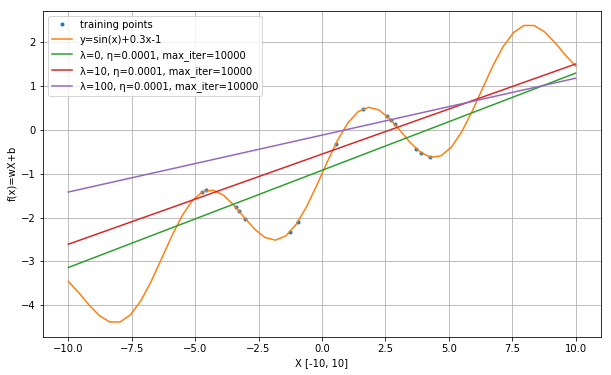

In [6]:
med_lambda = 10
w6, b6 = model.regression_gradient(data_set, 10, 0.0001, 10000)
large_lambda = 100
w7, b7 = model.regression_gradient(data_set, 100, 0.0001, 10000)

y6 = fpre(XX,w6,b6)
y7 = fpre(XX,w7,b7)

pylab.figure(figsize=(10,6))
pylab.plot(X_train, Y_train, '.')
pylab.plot(XX, YY, '-')
pylab.plot(XX, y3)
pylab.plot(XX, y6)
pylab.plot(XX, y7)
pylab.xlabel('X [-10, 10]')
pylab.ylabel('f(x)=wX+b')
pylab.grid()
pylab.legend(('training points', 'y=sin(x)+0.3x-1','λ=0, η=0.0001, max_iter=10000','λ=10, η=0.0001, max_iter=10000','λ=100, η=0.0001, max_iter=10000'))
pylab.show()

$5.$ Draw another dataset $D_{test}$ of 100 points by following the same procedure as $D_n$. Train your linear model on $D_n$ for $\lambda$ taking values in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]. For each value of $\lambda$, measure the
average quadratic loss on $D_{test}$. Report these values on a graph with $\lambda$ on the x-axis and the loss value on the y-axis.

In [7]:
def floss(v3, w, b, t3):
    """Returns the mean quadratic loss"""
    loss_value = np.mean(((w*v3+b)-t3)**2)
    return loss_value

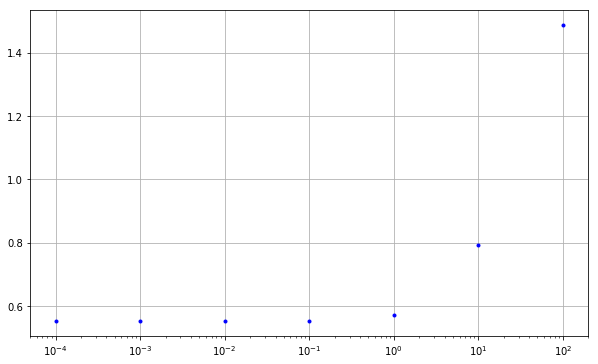

In [8]:
X_test = np.random.uniform(-5,5,100)
Y_test = fsin(X_test)

w7, b7 = model.regression_gradient(data_set, 0.0001, 0.001, 10000)
w8, b8 = model.regression_gradient(data_set, 0.001, 0.001, 10000)
w9, b9 = model.regression_gradient(data_set, 0.01, 0.001, 10000)
w10, b10 = model.regression_gradient(data_set, 0.1, 0.001, 10000)
w11, b11 = model.regression_gradient(data_set, 1, 0.001, 10000)
w12, b12 = model.regression_gradient(data_set, 10, 0.001, 10000)
w13, b13 = model.regression_gradient(data_set, 100, 0.001, 10000)

y7 = floss(X_test, w7, b7, Y_test)

y8 = floss(X_test, w8, b8, Y_test)
y9 = floss(X_test, w9, b9, Y_test)
y10 = floss(X_test, w10, b10, Y_test)
y11 = floss(X_test, w11, b11, Y_test)
y12 = floss(X_test, w12, b12, Y_test)
y13 = floss(X_test, w13, b13, Y_test)

pylab.figure(figsize=(10,6))

lamb = (0.0001, 0.001, 0.01, 0.1, 1, 10, 100)
los = (y7, y8, y9, y10, y11, y12, y13)

pylab.plot(lamb, los, '.', color = 'b' )
pylab.xscale('log')
pylab.grid()
pylab.show()

$6.$ Use the technique studied in problem 1.3 above to learn a non-linear function of x. Specifically, use Ridge regression with the fixed preprocessing $\phi_{poly^l}$ described above to get a polynomial regression of order l. Apply this technique with $\lambda$ = 0.01 and different values of l. Plot a graph similar to question 2.2 with all the prediction functions you got. Don’t plot too many functions to keep it readable and precise the value of l in the legend.

In [9]:
def polynomial(X, l):
    XP = np.zeros((X.shape[0], l))
    for i in range(0, l):
        XP[:,i] = X**(i+1)
    mu = np.zeros((1, l))
    xmin = np.zeros((1, l))
    xmax = np.zeros((1, l))
    mu = np.mean(XP, axis = 0)
    xmin = np.min(XP, axis = 0)
    xmax = np.max(XP, axis =0)

    XP_norm = (XP - mu)/(xmax - xmin)
    return XP_norm


In [10]:
Xl1 = polynomial(X_train, 1)
X_poly1 = np.c_[Xl1, data_set[:,-1]]

Xl2 = polynomial(X_train, 2)
X_poly2 = np.c_[Xl2, data_set[:,-1]]

Xl3 = polynomial(X_train, 3)
X_poly3 = np.c_[Xl3, data_set[:,-1]]

Xl4 = polynomial(X_train, 4)
X_poly4 = np.c_[Xl4, data_set[:,-1]]

Xl5 = polynomial(X_train, 5)
X_poly5 = np.c_[Xl5, data_set[:,-1]]

Xl20 = polynomial(X_train, 20)
X_poly20 = np.c_[Xl20, data_set[:,-1]]

model3 = RidgeRegression()
ww1, bb1 = model3.regression_gradient(X_poly1, 0.01, 0.0001, 100000)
ww2, bb2 = model3.regression_gradient(X_poly2, 0.01, 0.0001, 100000)
ww3, bb3 = model3.regression_gradient(X_poly3, 0.01, 0.0001, 100000)
#ww4, bb4 = model3.regression_gradient(X_poly4, 0.01, 0.0001, 100000)
#ww5, bb5 = model3.regression_gradient(X_poly5, 0.01, 0.0001, 100000)
ww20, bb20 = model3.regression_gradient(X_poly20, 0.01, 0.0001, 100000)

zz1 = np.dot(Xl1,ww1)+bb1
zz2 = np.dot(Xl2,ww2)+bb2
zz3 = np.dot(Xl3,ww3)+bb3
#z4 = np.dot(XX4,ww4)+bb4
#z5 = np.dot(XX5,ww5)+bb5
zz20 = np.dot(Xl20,ww20)+bb20

XX1 = polynomial(X_test, 1)
XX2 = polynomial(X_test, 2)
XX3 = polynomial(X_test, 3)
#XX4 = polynomial(X_test, 4)
#XX5 = polynomial(X_test, 5)
XX20 = polynomial(X_test, 20)

z1 = np.dot(XX1,ww1)+bb1
z2 = np.dot(XX2,ww2)+bb2
z3 = np.dot(XX3,ww3)+bb3
#z4 = np.dot(XX4,ww4)+bb4
#z5 = np.dot(XX5,ww5)+bb5
z20 = np.dot(XX20,ww20)+bb20



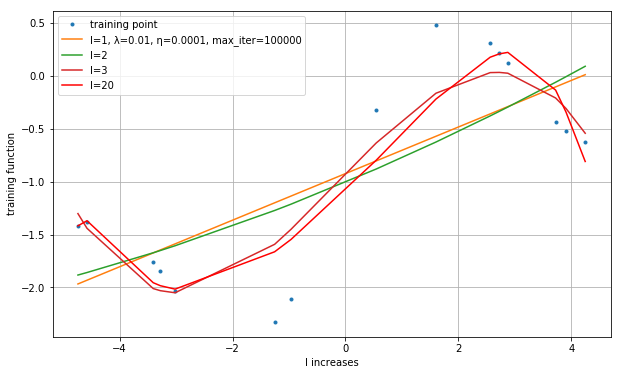

In [11]:
pylab.figure(figsize=(10,6))
pylab.plot(X_train, Y_train, '.')
#pylab.plot(XX, YY, '-')
pylab.plot(np.sort(X_train),zz1[np.argsort(X_train)])
pylab.plot(np.sort(X_train),zz2[np.argsort(X_train)])
pylab.plot(np.sort(X_train),zz3[np.argsort(X_train)])
#pylab.plot(np.sort(X_test),z4[np.argsort(X_test)])
#pylab.plot(np.sort(X_test),z5[np.argsort(X_test)])
pylab.plot(np.sort(X_train),zz20[np.argsort(X_train)],color='r')

pylab.grid()
pylab.legend(('training point','l=1, λ=0.01, η=0.0001, max_iter=100000', 'l=2','l=3','l=20'))
pylab.xlabel('l increases')
pylab.ylabel('training function')
pylab.show()

$7.$ Comment on what happens when l increases. What happens to the empirical risk (loss on $D_n$), and to the true risk (loss on $D_{test}$)?

In [13]:
def floss_train(train_set, w, b, t):
    loss_value = (1/15)*(((np.sum((w*train_set), axis = 1)-t)+b)**2)
    return loss_value

def floss_test(test_set, w, b, t):
    loss_value = (1/100)*(((np.sum((w*test_set), axis = 1)-t)+b)**2)
    return loss_value

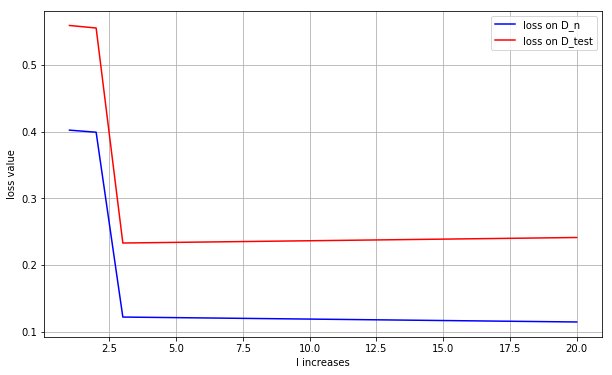

In [14]:
tl1 = np.sum(floss_train(Xl1, ww1, bb1, Y_train))
tl2 = np.sum(floss_train(Xl2, ww2, bb2, Y_train))
tl3 = np.sum(floss_train(Xl3, ww3, bb3, Y_train))
#tl4 = np.sum(floss_train(Xl4, ww4, bb4, Y))
#tl5 = np.sum(floss_train(Xl5, ww5, bb5, Y))
tl20 = np.sum(floss_train(Xl20, ww20, bb20, Y_train))

lt = (1, 2, 3, 20)
tl = (tl1, tl2, tl3, tl20)

Xh1 = polynomial(X_test, 1)
Xh2 = polynomial(X_test, 2)
Xh3 = polynomial(X_test, 3)
#Xh4 = polynomial(X_test, 4)
#Xh5 = polynomial(X_test, 5)
Xh20 = polynomial(X_test, 20)

th1 = np.sum(floss_test(Xh1, ww1, bb1, Y_test))
th2 = np.sum(floss_test(Xh2, ww2, bb2, Y_test))
th3 = np.sum(floss_test(Xh3, ww3, bb3, Y_test))
#th4 = np.sum(floss_test(Xh4, ww4, bb4, Y_test))
#th5 = np.sum(floss_test(Xh5, ww5, bb5, Y_test))
th20 = np.sum(floss_test(Xh20, ww20, bb20, Y_test))

th = (th1, th2, th3, th20)

pylab.figure(figsize=(10,6))
pylab.plot(lt, tl,'b')
pylab.plot(lt, th,'r')
pylab.xlabel('l increases')
pylab.ylabel('Mean quadratic loss')
pylab.grid()
pylab.legend(('loss on D_n', 'loss on D_test'))
pylab.show()

**We can see that while the loss on the training data decreases as we increase the degree of our polynomial, the loss on the test data increases due to overfitting the training data**